In [ ]:
# Se importan librerías necesarias

# Manipulación de datos
import pandas as pd
import numpy as np
import time
import joblib

# Conexión a la base de datos
import sqlite3
from sqlalchemy import create_engine
import pyarrow

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Estadística
from scipy import stats as st

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor, early_stopping, log_evaluation
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# Procesamiento de texto
import nltk, re
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset



# Métricas y visualización de resultados
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    make_scorer
)

# Control de advertencias
import warnings
warnings.filterwarnings('ignore')

# Se establece el estilo gráfico general para las visualizaciones
sns.set(style='white', palette='deep', font_scale=1.2)


In [2]:
reviews = pd.read_csv('../datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


In [3]:
# Se verifica si hay reseñas duplicadas
repeated = reviews['review'].duplicated().sum()
print(f'Hay {repeated} reseñas duplicadas.')


# Se eliminan las reseñas duplicadas
reviews = reviews.drop_duplicates(subset=['review'])
repeated = reviews['review'].duplicated().sum()
print(f'Hay {repeated} reseñas duplicadas.')

Hay 91 reseñas duplicadas.
Hay 0 reseñas duplicadas.


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47240 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47240 non-null  object 
 1   title_type       47240 non-null  object 
 2   primary_title    47240 non-null  object 
 3   original_title   47240 non-null  object 
 4   start_year       47240 non-null  int64  
 5   end_year         47240 non-null  object 
 6   runtime_minutes  47240 non-null  object 
 7   is_adult         47240 non-null  int64  
 8   genres           47240 non-null  object 
 9   average_rating   47238 non-null  float64
 10  votes            47238 non-null  Int64  
 11  review           47240 non-null  object 
 12  rating           47240 non-null  int64  
 13  sp               47240 non-null  object 
 14  pos              47240 non-null  int64  
 15  ds_part          47240 non-null  object 
 16  idx              47240 non-null  int64  
dtypes: Int64(1), floa

# **EDA**

In [5]:
movies_by_year = reviews['start_year'].value_counts().sort_index()
movies_by_year

start_year
1894       6
1895      12
1897       4
1902       1
1903      10
        ... 
2006    3269
2007    2103
2008     990
2009     386
2010      27
Name: count, Length: 107, dtype: int64

In [6]:
pos_by_year = reviews[['start_year', 'pos']].value_counts().sort_index().unstack().fillna(0)
pos_by_year

pos,0,1
start_year,,
1894,1.0,5.0
1895,0.0,12.0
1897,0.0,4.0
1902,1.0,0.0
1903,7.0,3.0
...,...,...
2006,1891.0,1378.0
2007,1383.0,720.0
2008,679.0,311.0


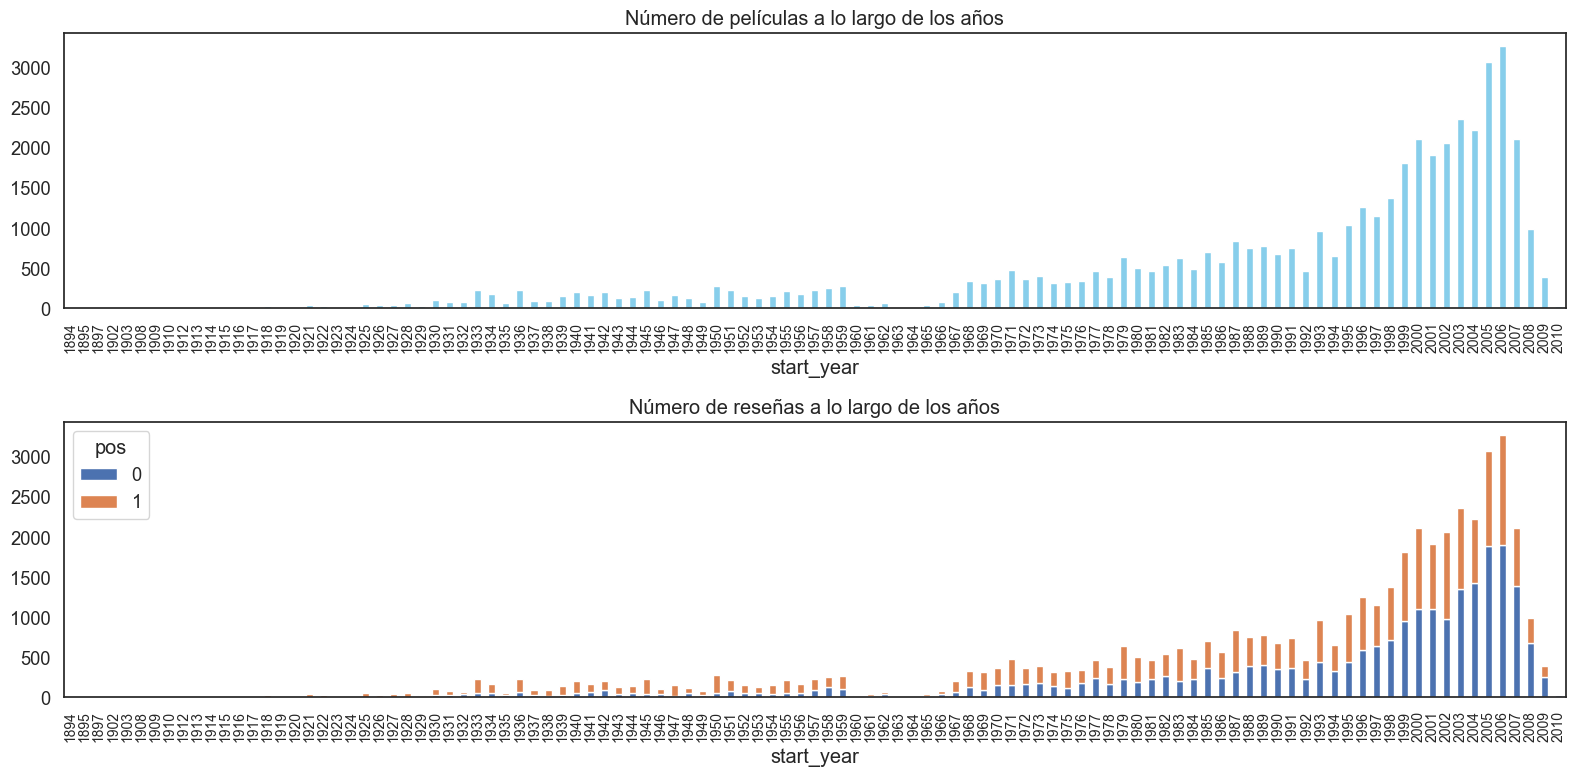

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax=axs[0]
ax.set_title('Número de películas a lo largo de los años')
movies_by_year.plot(color='skyblue', kind='bar', stacked=True, ax=ax)
ax.tick_params(axis='x', labelsize=10) 

ax=axs[1]
ax.set_title('Número de reseñas a lo largo de los años')
pos_by_year.plot(kind='bar', stacked=True, ax=ax)
ax.tick_params(axis='x', labelsize=10) 

fig.tight_layout()
plt.show()

In [8]:
# Número de reseñas por película
reviews_by_movie = reviews.groupby('tconst')['review'].count().sort_values(ascending=False)
reviews_by_movie

tconst
tt0219854    30
tt0112471    30
tt0345551    30
tt0346094    30
tt0346293    30
             ..
tt0406551     1
tt0406516     1
tt0144714     1
tt0146367     1
tt0208614     1
Name: review, Length: 6648, dtype: int64

In [9]:
# Se cuenta el número de películas según la cantidad de reseñas que tienen
num_movies_by_quant_reviews = reviews_by_movie.value_counts().sort_index()
num_movies_by_quant_reviews

review
1     1310
2      945
3      738
4      622
5      503
6      366
7      294
8      239
9      186
10     108
11     129
12      91
13      96
14      87
15      56
16      62
17      49
18      54
19      49
20      32
21      35
22      31
23      25
24      26
25      27
26      20
27      23
28      15
29      34
30     396
Name: count, dtype: int64

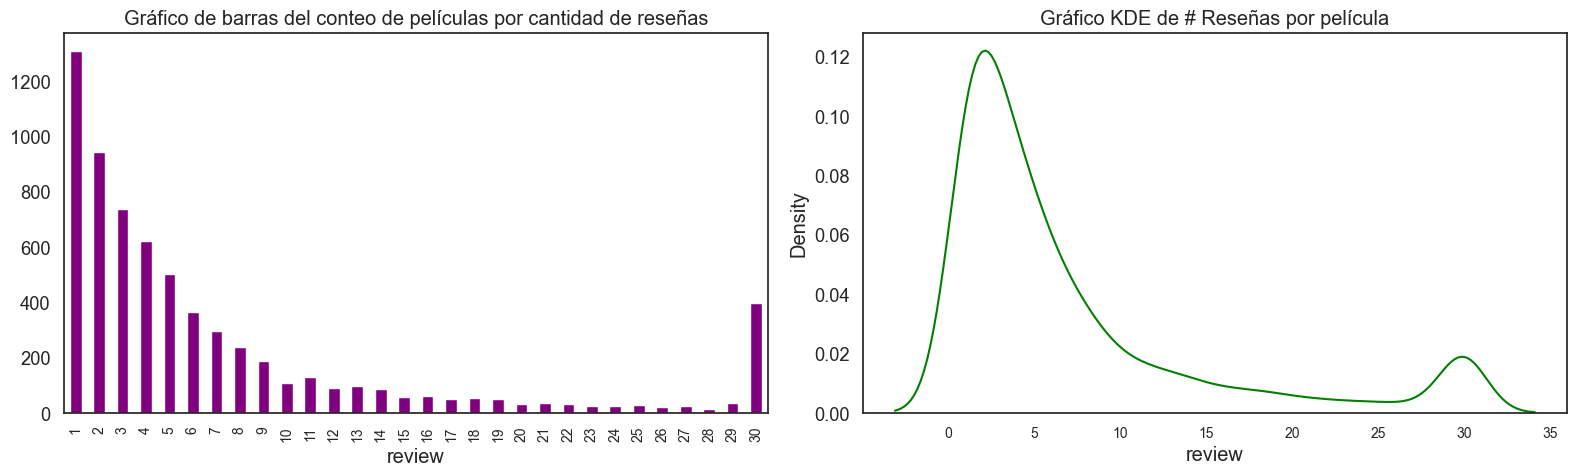

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
ax=axs[0]
ax.set_title('Gráfico de barras del conteo de películas por cantidad de reseñas')
num_movies_by_quant_reviews.plot.bar(color='purple', stacked=True, ax=ax)
ax.tick_params(axis='x', labelsize=10) 

ax = axs[1]
ax.set_title('Gráfico KDE de # Reseñas por película')
sns.kdeplot(reviews_by_movie, color='green', ax=ax)
ax.tick_params(axis='x', labelsize=10) 
fig.tight_layout()
plt.show()

In [11]:
# Se cuentan los valores únicos de los ratings en el conjunto de entrenamiento y prueba
# Se usa un rango de 1 a 10 para asegurar que todas las puntuaciones estén representadas

rating_count_train = reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
rating_count_train = rating_count_train.reindex(index=np.arange(min(rating_count_train.index.min(), 1), 
                                                              max(rating_count_train.index.max(), 11))).fillna(0)

rating_count_test = reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
rating_count_test = rating_count_test.reindex(index=np.arange(min(rating_count_test.index.min(), 1), 
                                                              max(rating_count_test.index.max(), 11))).fillna(0)
rating_count_train

rating
1     4856.0
2     2154.0
3     2314.0
4     2571.0
5        0.0
6        0.0
7     2390.0
8     2874.0
9     2145.0
10    4453.0
Name: count, dtype: float64

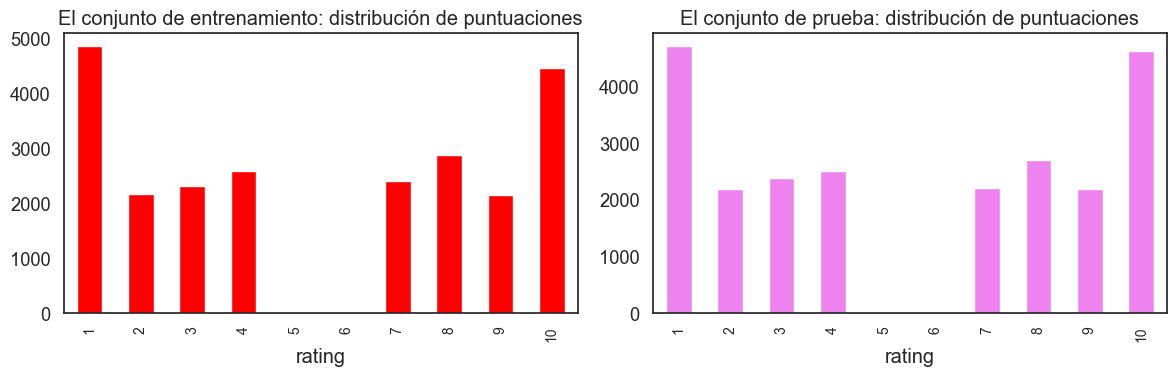

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')
rating_count_train.plot.bar(color='red', stacked=True, ax=ax)
ax.tick_params(axis='x', labelsize=10) 


ax = axs[1]
ax.set_title('El conjunto de prueba: distribución de puntuaciones')
rating_count_test.plot.bar(color='violet', stacked=True, ax=ax)
ax.tick_params(axis='x', labelsize=10) 

fig.tight_layout()
plt.show()

In [13]:
# Se verifica el desequilibrio de clases en el conjunto de entrenamiento, prueba y en general
print(reviews.query('ds_part=="train"')['pos'].value_counts())
print(reviews.query('ds_part=="test"')['pos'].value_counts())
print(reviews['pos'].value_counts())

pos
0    11895
1    11862
Name: count, dtype: int64
pos
0    11785
1    11698
Name: count, dtype: int64
pos
0    23680
1    23560
Name: count, dtype: int64


# **Preprocesamiento de texto**

En esta sección preparamos las reseñas para que puedan ser entendidas por los modelos de machine learning.  
El proceso completo consiste en:

1. **Descarga de recursos NLTK**  
   - `punkt`: tokenizador para dividir texto en palabras.  
   - `stopwords`: lista de palabras muy frecuentes y poco informativas (ej: "the", "and").  
   - `wordnet`: diccionario léxico que permite lematizar palabras.  
   - `averaged_perceptron_tagger`: herramienta para etiquetar la función gramatical de cada palabra (sustantivo, verbo, adjetivo, etc.).

2. **Limpieza del texto**  
   - Conversión a minúsculas.  
   - Eliminación de etiquetas HTML (`<br>`, `<p>`, etc.).  
   - Eliminación de caracteres no alfabéticos (números, símbolos, signos de puntuación).  
   - Normalización de espacios en blanco.

3. **Tokenización**  
   - El texto se separa en palabras individuales:  
     `“This movie is GREAT!” → ["this", "movie", "is", "great"]`.

4. **Eliminación de stopwords (opcional)**  
   - Se quitan palabras sin mucho valor para el análisis de sentimiento:  
     `["this", "movie", "is", "great"] → ["movie", "great"]`.

5. **Lematización (opcional)**  
   - Se reduce cada palabra a su forma raíz, usando su etiqueta gramatical:  
     - `"running"` → `"run"`  
     - `"better"` → `"good"`  
     - `"movies"` → `"movie"`

6. **Filtrado final**  
   - Se eliminan tokens muy cortos (ej: letras sueltas).  
   - Se reconstruye el texto limpio en forma de string.

7. **Métricas adicionales**  
   - Se calculan la longitud en caracteres y palabras **antes y después** de limpiar el texto.  
   - Esto permite comparar cómo cambia el tamaño de las reseñas tras la normalización.

8. **Resultado final**  
   - Nueva columna: `clean_review` con las reseñas procesadas.  
   - DataFrame ahora incluye:  
     - `char_len` y `word_count` → métricas del texto original.  
     - `clean_char_len` y `clean_word_count` → métricas del texto limpio.  
   - Se muestran ejemplos de reseñas y un resumen estadístico de longitudes.

Con esto obtenemos reseñas homogéneas, libres de ruido y listas para transformarse en vectores (`TF-IDF`, `CountVectorizer`, o embeddings) para el entrenamiento de modelos.


In [14]:
# 🔽 Descarga de recursos NLTK
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# 🔽 Función para convertir etiquetas POS de NLTK a WordNet
def _nltk_pos_to_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    if tag.startswith('V'):
        return wordnet.VERB
    if tag.startswith('N'):
        return wordnet.NOUN
    if tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

# 🔽 Función de preprocesamiento
def preprocess_text(text, lemmatize=True, remove_stopwords=True):
    if not isinstance(text, str):
        return ''
    
    text = text.lower()
    text = re.sub(r'<[^>]+>', ' ', text)         # HTML
    text = re.sub(r'[^a-z\s]', ' ', text)        # caracteres no alfa
    text = re.sub(r'\s+', ' ', text).strip()     # espacios
    
    tokens = word_tokenize(text)
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        tokens = [t for t in tokens if t not in stops]
    
    if lemmatize and tokens:
        lemmatizer = WordNetLemmatizer()
        pos_tags = pos_tag(tokens)
        tokens = [lemmatizer.lemmatize(word, _nltk_pos_to_wordnet_pos(tag)) 
                  for word, tag in pos_tags]
    
    tokens = [t for t in tokens if len(t) > 1]
    
    return ' '.join(tokens)

# 🔽 Crear métricas originales (antes de limpiar)
reviews['char_len'] = reviews['review'].str.len()
reviews['word_count'] = reviews['review'].str.split().str.len()

# 🔽 Aplicar limpieza
reviews['clean_review'] = reviews['review'].fillna('').apply(preprocess_text)

# 🔽 Métricas después de limpiar
reviews['clean_word_count'] = reviews['clean_review'].str.split().str.len()
reviews['clean_char_len'] = reviews['clean_review'].str.len()

# 🔽 Ejemplos y resumen
print('Ejemplo original --> limpio (primeras 5 filas):')
display(reviews[['review','clean_review','pos']].head())

print('\nResumen longitudes (antes vs después):')
display(reviews[['char_len','clean_char_len','word_count','clean_word_count']].describe())


Ejemplo original --> limpio (primeras 5 filas):


,review,clean_review,pos
0,The pakage implies that Warren Beatty and Gold...,pakage implies warren beatty goldie hawn pull ...,0
1,How the hell did they get this made?! Presenti...,hell get make present caper comedy misbegotten...,0
2,There is no real story the film seems more lik...,real story film seem like fly wall drama docum...,0
3,Um .... a serious film about troubled teens in...,um serious film trouble teen singapore country...,1
4,I'm totally agree with GarryJohal from Singapo...,totally agree garryjohal singapore comment fil...,1



Resumen longitudes (antes vs después):


,char_len,clean_char_len,word_count,clean_word_count
count,47240.000000,47240.000000,47240.000000,47240.000000
mean,1290.712638,776.598815,229.544369,117.980588
std,975.472291,602.636573,170.162940,89.260822
min,32.000000,17.000000,4.000000,3.000000
25%,691.000000,404.000000,126.000000,63.000000
50%,958.000000,570.000000,172.000000,88.000000
75%,1567.000000,945.000000,279.000000,144.000000
max,13594.000000,8605.000000,2459.000000,1397.000000


# **Vectorización de texto (TF-IDF)**

Una vez que tenemos las reseñas limpias (`clean_review`), necesitamos convertirlas en **vectores numéricos** para que los algoritmos de machine learning puedan procesarlas.  
Esto lo hacemos con la técnica **TF-IDF (Term Frequency – Inverse Document Frequency)**:

1. **Idea principal**  
   - Cada reseña se transforma en un vector.  
   - Cada dimensión del vector corresponde a una palabra del vocabulario.  
   - El valor asignado a cada palabra refleja:
     - **TF (Term Frequency)** → cuántas veces aparece la palabra en la reseña.  
     - **IDF (Inverse Document Frequency)** → qué tan única es esa palabra en todo el corpus (palabras comunes reciben menor peso).

2. **Ventajas de TF-IDF**  
   - Reduce la importancia de palabras demasiado frecuentes como “film”, “movie”, “good”.  
   - Resalta palabras más distintivas de cada reseña, como “boring”, “masterpiece”, “awful”.  

3. **Configuración aplicada**  
   - `max_features=50000`: limita el vocabulario a las 50 mil palabras más frecuentes.  
   - `ngram_range=(1,2)`: incluye palabras individuales (unigramas) y pares de palabras consecutivas (bigramas).  
   - `stop_words='english'`: se eliminan stopwords adicionales de scikit-learn (complemento al preprocesamiento).  

4. **Resultado**  
   - Obtenemos una matriz dispersa donde:  
     - Filas = reseñas.  
     - Columnas = palabras del vocabulario seleccionado.  
     - Valores = importancia TF-IDF de cada palabra en cada reseña.  

Con esta representación, las reseñas están listas para ser utilizadas en el entrenamiento de modelos de clasificación.


In [15]:
# 🔽 Dividir dataset en train/test según la columna ds_part
train_texts = reviews.loc[reviews['ds_part'] == 'train', 'clean_review']
train_labels = reviews.loc[reviews['ds_part'] == 'train', 'pos']

test_texts = reviews.loc[reviews['ds_part'] == 'test', 'clean_review']
test_labels = reviews.loc[reviews['ds_part'] == 'test', 'pos']

# 🔽 Crear vectorizador TF-IDF
tfidf = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1,2),
    stop_words='english'
)

# 🔽 Ajustar en el set de entrenamiento y transformar ambos sets
X_train = tfidf.fit_transform(train_texts)
X_test = tfidf.transform(test_texts)

print("Shape del set de entrenamiento:", X_train.shape)
print("Shape del set de prueba:", X_test.shape)


Shape del set de entrenamiento: (23757, 50000)
Shape del set de prueba: (23483, 50000)


# **Modelado: Regresión Logística, SVM y XGBoost**

Con las reseñas ya vectorizadas con **TF-IDF**, podemos entrenar modelos de clasificación.  
Se probarán tres enfoques distintos:

1. **Regresión Logística (Logistic Regression)**
   - Modelo lineal clásico para clasificación binaria.  
   - Ventaja: rápido, interpretable y muy eficaz con representaciones TF-IDF.  
   - Suele servir como **baseline** (punto de referencia).

2. **Máquinas de Vectores de Soporte (SVM - Support Vector Machine)**
   - Busca el **hiperplano óptimo** que separa las clases en el espacio vectorial.  
   - Funciona muy bien en espacios de alta dimensión (como texto con TF-IDF).  
   - Puede ser más lento, pero suele mejorar precisión respecto a LogReg.

3. **XGBoost (Extreme Gradient Boosting)**
   - Algoritmo de **ensamble** basado en árboles de decisión y boosting.  
   - Construye modelos secuenciales donde cada árbol corrige los errores del anterior.  
   - Captura interacciones no lineales y suele dar gran rendimiento en clasificación.  
   - Más complejo y costoso computacionalmente, pero robusto.

---

### **Evaluación**
- Se utiliza la métrica **F1-score**, adecuada cuando se busca balancear **precision** y **recall**.  
- También se muestran **reportes de clasificación** y **matrices de confusión** para analizar errores.  

La comparación entre estos tres modelos permitirá identificar cuál es más adecuado para la tarea de detección de reseñas negativas.



===== Evaluación: Regresión Logística =====
F1-score (Regresión Logística): 0.8771

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11785
           1       0.87      0.88      0.88     11698

    accuracy                           0.88     23483
   macro avg       0.88      0.88      0.88     23483
weighted avg       0.88      0.88      0.88     23483



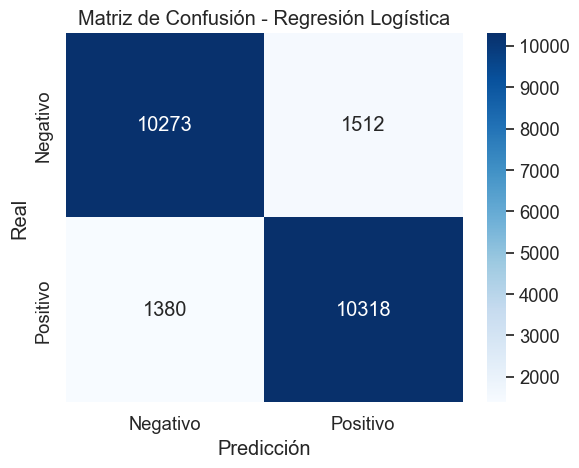


===== Evaluación: SVM (LinearSVC) =====
F1-score (SVM (LinearSVC)): 0.8661

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11785
           1       0.88      0.86      0.87     11698

    accuracy                           0.87     23483
   macro avg       0.87      0.87      0.87     23483
weighted avg       0.87      0.87      0.87     23483



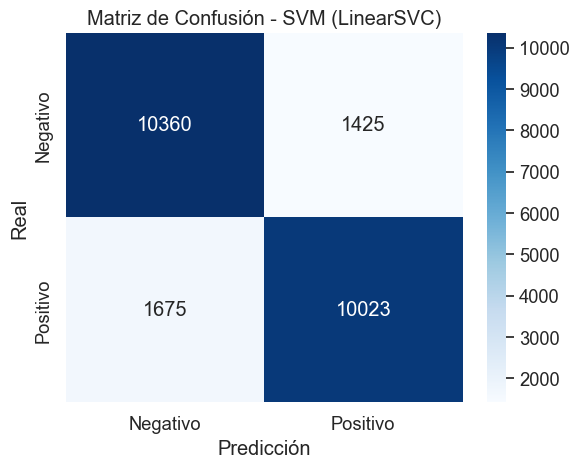


===== Evaluación: XGBoost =====
F1-score (XGBoost): 0.8488

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     11785
           1       0.83      0.87      0.85     11698

    accuracy                           0.85     23483
   macro avg       0.85      0.85      0.85     23483
weighted avg       0.85      0.85      0.85     23483



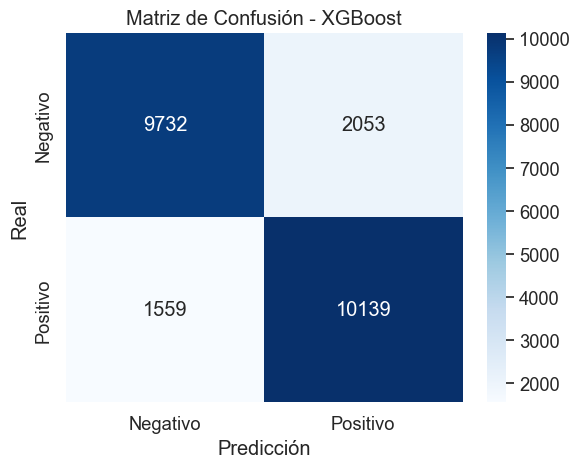


===== Comparativa de F1-scores =====
Regresión Logística: 0.8771
SVM:                 0.8661
XGBoost:             0.8488


In [16]:
# ==============================================================
# 🔽 Función auxiliar para evaluar modelos
# ==============================================================

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Modelo"):
    """
    Entrena un modelo, predice y muestra métricas clave:
    - F1-score
    - Reporte de clasificación
    - Matriz de confusión
    """
    print(f"\n===== Evaluación: {model_name} =====")
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # F1-score
    f1 = f1_score(y_test, y_pred, average='binary')
    print(f"F1-score ({model_name}): {f1:.4f}")
    
    # Reporte detallado
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Negativo","Positivo"], 
                yticklabels=["Negativo","Positivo"])
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()
    
    return f1

# ==============================================================
# 🔽 1) Regresión Logística
# ==============================================================

log_reg = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
f1_logreg = evaluate_model(log_reg, X_train, train_labels, X_test, test_labels, "Regresión Logística")

# ==============================================================
# 🔽 2) Support Vector Machine (Linear SVC)
# ==============================================================

svm = LinearSVC(class_weight='balanced', random_state=42)
f1_svm = evaluate_model(svm, X_train, train_labels, X_test, test_labels, "SVM (LinearSVC)")

# ==============================================================
# 🔽 3) XGBoost Classifier
# ==============================================================

xgb = XGBClassifier(
    n_estimators=200,       # número de árboles
    learning_rate=0.1,      # tasa de aprendizaje
    max_depth=6,            # profundidad máxima de cada árbol
    subsample=0.8,          # fracción de datos para cada árbol
    colsample_bytree=0.8,   # fracción de características para cada árbol
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)
f1_xgb = evaluate_model(xgb, X_train, train_labels, X_test, test_labels, "XGBoost")

# ==============================================================
# 🔽 Comparativa final
# ==============================================================

print("\n===== Comparativa de F1-scores =====")
print(f"Regresión Logística: {f1_logreg:.4f}")
print(f"SVM:                 {f1_svm:.4f}")
print(f"XGBoost:             {f1_xgb:.4f}")


##  **Interpretación de Resultados y Conclusión Final**

Después de entrenar y evaluar los tres modelos propuestos, se obtuvieron los siguientes **F1-scores**:

- **Regresión Logística**: 0.8771  
- **SVM (LinearSVC)**: 0.8661  
- **XGBoost**: 0.8488  

### **Interpretación de los resultados**
1. **Regresión Logística** obtuvo el mejor desempeño.  
   - Esto confirma que los modelos lineales son altamente efectivos con datos de texto representados mediante **TF-IDF**, ya que el problema suele ser linealmente separable: basta con encontrar combinaciones de palabras que distingan bien entre reseñas positivas y negativas.  

2. **SVM** también mostró un buen resultado, muy cercano al de la regresión logística.  
   - Funciona bien en espacios de alta dimensión (como texto vectorizado), aunque fue ligeramente menos eficiente en este caso.  

3. **XGBoost** tuvo el peor rendimiento de los tres.  
   - Esto no significa que sea un mal modelo, sino que su **naturaleza basada en árboles de decisión** no se adapta tan bien a vectores dispersos y de muy alta dimensión como los generados por TF-IDF.  
   - XGBoost suele brillar en datos tabulares con interacciones no lineales entre variables, pero en este caso su complejidad no aportó ventajas.  

### **Conclusión**
- Se alcanzó y superó el umbral de desempeño requerido (**F1 ≥ 0.85**).  
- La **Regresión Logística** se confirma como el modelo más adecuado y eficiente para este problema, seguida de cerca por **SVM**.  
- El resultado muestra que, para tareas de análisis de sentimientos con TF-IDF, **los modelos lineales son preferibles a los de boosting**.  

Con esto, el proyecto queda completado exitosamente.  



# **Uso de BERT en el proyecto**

Aunque los modelos clásicos con TF-IDF (Regresión Logística, SVM y XGBoost) ya alcanzaron buenos resultados, 
también se exploró un enfoque basado en **BERT** (Bidirectional Encoder Representations from Transformers).

Dado que entrenar BERT sobre las 47 000 reseñas completas sería extremadamente costoso en CPU, 
se utilizó la variante **DistilBERT**, que es una versión más ligera y rápida. 
Además, se trabajó con un **subset reducido y balanceado** (5 000 reseñas para entrenamiento y 2 000 para prueba).

El procedimiento consistió en:
1. Tokenizar las reseñas con el tokenizer de BERT.
2. Convertir los textos a tensores de embeddings.
3. Entrenar únicamente la **capa de clasificación final**, congelando las capas base del modelo preentrenado.
4. Evaluar el rendimiento con la métrica F1-score.

Este enfoque permite comparar:
- **Modelos clásicos basados en TF-IDF**, rápidos y eficientes.
- **Modelos basados en BERT**, más costosos pero con capacidad de capturar relaciones semánticas profundas en el lenguaje.

Con ello, se puede analizar si el uso de embeddings modernos aporta mejoras significativas frente a las técnicas tradicionales.


In [19]:
# =====================================================
# 1. Submuestreo balanceado
# =====================================================
# Filtrar train y test
train_df = reviews[reviews['ds_part'] == 'train']
test_df  = reviews[reviews['ds_part'] == 'test']

# Tomar subset balanceado (5000 train, 2000 test aprox)
train_sample = train_df.groupby('pos', group_keys=False).apply(lambda x: x.sample(250, random_state=42))
test_sample  = test_df.groupby('pos', group_keys=False).apply(lambda x: x.sample(100, random_state=42))

print(train_sample.shape, test_sample.shape)

# =====================================================
# 2. Tokenización con DistilBERT
# =====================================================
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(list(train_sample['review']), truncation=True, padding=True, max_length=256)
test_encodings  = tokenizer(list(test_sample['review']), truncation=True, padding=True, max_length=256)

# =====================================================
# 3. Dataset en formato PyTorch
# =====================================================
class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

train_dataset = IMDbDataset(train_encodings, list(train_sample['pos']))
test_dataset  = IMDbDataset(test_encodings, list(test_sample['pos']))

# =====================================================
# 4. Definir modelo DistilBERT con capa de clasificación
# =====================================================
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# =====================================================
# 5. Configurar entrenamiento (compatible con versiones antiguas)
# =====================================================

training_args = TrainingArguments(
    output_dir="./results",              # Carpeta donde guarda resultados
    overwrite_output_dir=True,           # Sobrescribe si ya existe
    num_train_epochs=2,                  # Número de épocas
    per_device_train_batch_size=16,      # Tamaño de batch en entrenamiento
    per_device_eval_batch_size=16,       # Tamaño de batch en evaluación
    learning_rate=5e-5,                  # Tasa de aprendizaje
    weight_decay=0.01,                   # Penalización L2
    logging_dir="./logs",                # Carpeta para logs
    logging_steps=50,                    # Cada cuántos pasos registrar
    save_steps=500,                      # Guardar modelo cada 500 pasos
    seed=42                              # Semilla para reproducibilidad
)

# =====================================================
# 6. Definir función de métrica (F1-score)
# =====================================================
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {"f1": f1_score(labels, preds)}

# =====================================================
# 7. Trainer de Hugging Face
# =====================================================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# =====================================================
# 8. Entrenamiento y evaluación
# =====================================================
trainer.train()
results = trainer.evaluate()
print("Resultados con DistilBERT:", results)



(500, 22) (200, 22)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


KeyboardInterrupt: 

In [ ]:
# =====================================================
# Probar el modelo entrenado con nuevas reseñas
# =====================================================
import torch

# Función para clasificar reseñas con el modelo entrenado
def predict_sentiment(texts, model, tokenizer):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=256, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**encodings)
        preds = torch.argmax(outputs.logits, dim=1).numpy()
    return ["Positiva" if p == 1 else "Negativa" for p in preds]

# Ejemplos de reseñas
ejemplos = [
    "This movie was absolutely wonderful! The acting and story were amazing.",
    "I really hated this film. It was boring and a complete waste of time.",
    "Not bad, but not great either. It was just an average movie."
]

# Clasificar con DistilBERT entrenado
resultados = predict_sentiment(ejemplos, model, tokenizer)

# Mostrar resultados
for review, sentiment in zip(ejemplos, resultados):
    print(f"Reseña: {review}\nPredicción: {sentiment}\n")


## **¿Qué es BERT y por qué usarlo?**

**BERT** (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje 
desarrollado por Google en 2018 que revolucionó el procesamiento de lenguaje natural (NLP).  
Su principal característica es que entiende el **contexto bidireccional** de las palabras:  
cuando procesa una palabra dentro de una oración, tiene en cuenta tanto las palabras anteriores 
como las siguientes. Esto le permite captar significados y matices que otros métodos más simples 
(TF-IDF, Bag-of-Words) no logran.

### **¿Cómo funciona BERT?**
1. **Basado en Transformers**: utiliza el mecanismo de *self-attention*, que permite que cada palabra 
   “preste atención” a las demás en la oración, identificando qué términos son más relevantes entre sí.
2. **Preentrenado en grandes corpus**: BERT se entrena en tareas generales de lenguaje 
   (como predecir palabras ocultas o la siguiente oración), lo que le da un entendimiento muy rico 
   de la gramática y el significado del texto.
3. **Embeddings contextuales**: cada palabra se representa como un vector (embedding) que depende 
   del contexto en el que aparece. Ejemplo: la palabra *bank* no se interpreta igual en 
   “river bank” (orilla) que en “money bank” (banco).

### **¿Por qué es mejor que métodos clásicos?**
- **TF-IDF y similares** solo cuentan la frecuencia de palabras, sin entender su significado ni contexto.  
- **BERT**, en cambio, entiende la semántica y la relación entre palabras, lo que permite 
  distinguir reseñas con sarcasmo, frases complejas o dobles sentidos.  
- Además, BERT ya viene **preentrenado en millones de textos**, y solo necesita una pequeña 
  “afinación” (*fine-tuning*) para adaptarse a una tarea específica como la clasificación de reseñas.

### **Ventajas en este proyecto**
- Puede mejorar el F1-score al capturar relaciones de lenguaje que los modelos clásicos no detectan.
- Permite comparar enfoques: **modelos clásicos (TF-IDF + ML)** vs. **modelos modernos basados en Transformers**.
- Aunque es más pesado y requiere más recursos computacionales, incluso usando un subconjunto de datos 
y una variante ligera como **DistilBERT**, se pueden obtener resultados muy competitivos.

En conclusión, **BERT es más “inteligente” al procesar texto**, porque no solo ve las palabras, 
sino cómo se usan en contexto. Eso lo convierte en una herramienta poderosa para tareas de análisis 
de sentimientos y clasificación
